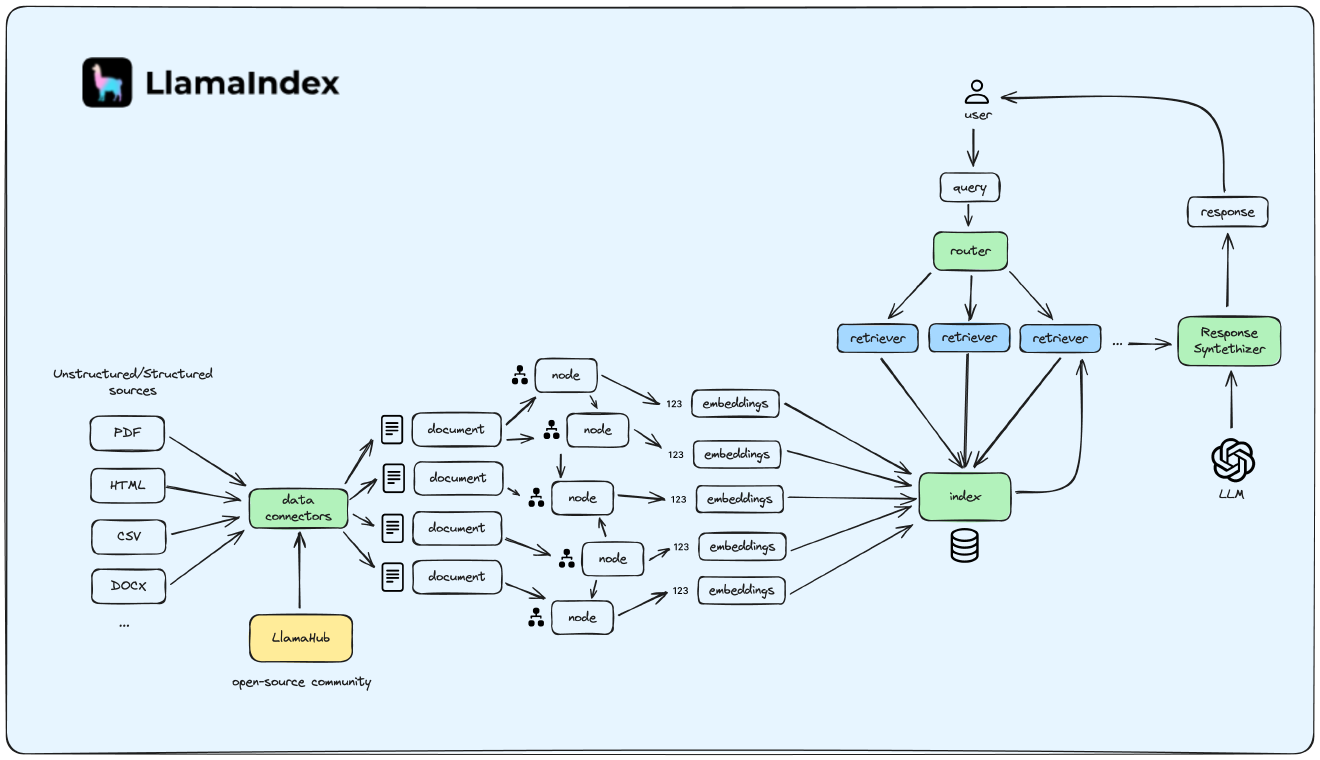

In [1]:
!pip install llama-index llama-index-llms-azure-openai llama-index-embeddings-azure-openai chromadb llama-index-vector-stores-chroma

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.5/88.5 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 6.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 4.6 MB/s eta 0:00:00
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
INFO: pip is looking at multiple versions of llama-cloud-services to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of llama-cloud-services to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl 

In [1]:
from google.colab import userdata

AZURE_OPENAI_ENDPOINT = userdata.get('AZURE_OPENAI_ENDPOINT')
AZURE_OPENAI_KEY = userdata.get('AZURE_OPENAI_KEY')
DEPLOYMENT_NAME = userdata.get('DEPLOYMENT_NAME')

In [2]:
from llama_index.llms.azure_openai import AzureOpenAI

# ====== Step 1: Initialize the LLM ======
llm = AzureOpenAI(
    model=DEPLOYMENT_NAME,
    deployment_name=DEPLOYMENT_NAME,
    api_key=AZURE_OPENAI_KEY,
    azure_endpoint=AZURE_OPENAI_ENDPOINT,
    api_version="2023-05-15",
)

In [3]:
from llama_index.embeddings.azure_openai import AzureOpenAIEmbedding

# ====== Step 2: Initialize Azure OpenAI embedding model ======
embed_model = AzureOpenAIEmbedding(
    model="text-embedding-3-small",  # model type
    deployment_name="text-embedding-3-small",
    api_key=AZURE_OPENAI_KEY,
    azure_endpoint=AZURE_OPENAI_ENDPOINT,
    api_version="2023-05-15",
)

In [4]:
from llama_index.core import Settings

# ====== STEP 3: Register models globally (important!) ======
Settings.llm = llm
Settings.embed_model = embed_model

In [5]:
from llama_index.core.llms import ChatMessage

messages = [
    ChatMessage(role="system", content="You are a helpful assistant."),
    ChatMessage(role="user", content="Explain quantum computing in simple terms."),
]

response = llm.chat(messages)

In [6]:
print(response.raw)

ChatCompletion(id='chatcmpl-CWFoW0X7aqx5pRVeIleMUqNDFICq2', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='Sure! Quantum computing is a type of computing that uses the principles of quantum mechanics, which is the science that explains how very tiny things like atoms and particles behave. Here\'s a simple way to think about it:\n\n### Classical Computers vs. Quantum Computers\n- **Classical computers** (like the one you\'re using now) process information using "bits." A bit can be either a 0 or a 1, like a light switch that\'s either off or on. These bits are the building blocks of all the calculations your computer does.\n- **Quantum computers**, on the other hand, use "qubits" (short for quantum bits). Qubits are special because they can be 0, 1, or both at the same time! This is called **superposition**, and it\'s one of the key ideas in quantum mechanics.\n\n### Why is this important?\nBecause qubits can exist in multiple states

In [8]:
text = "Artificial intelligence is transforming the world of technology."

embedding = embed_model.get_text_embedding(text)

print("Text:", text)
print("\nEmbedding vector (first 10 values):")
print(embedding[:10])
print(f"\nEmbedding length: {len(embedding)}")


Text: Artificial intelligence is transforming the world of technology.

Embedding vector (first 10 values):
[-0.004104056861251593, -0.014764953404664993, 0.01560131274163723, 0.01925770379602909, 0.03757182136178017, -0.03549164533615112, -0.008283170871436596, 0.06982525438070297, -0.018839523196220398, 0.01137662772089243]

Embedding length: 1536


In [9]:
# setup a client

import chromadb
client = chromadb.Client()

In [10]:
client.heartbeat()

1761803356625651245

In [11]:
import os

os.makedirs("articles", exist_ok=True)
print("New 'articles' folder created.")

articles = {
    "ai.txt": """Artificial Intelligence (AI) focuses on creating systems that can perform tasks that normally require human intelligence.
It includes perception, reasoning, learning, problem-solving, and interaction with the environment.
Modern AI drives innovations in healthcare, robotics, and language understanding.""",

    "machine_learning.txt": """Machine Learning (ML) enables computers to learn from data rather than relying on explicit programming.
It powers systems like recommendation engines, predictive analytics, and fraud detection.
Key techniques include supervised learning, unsupervised learning, and reinforcement learning.""",

    "deep_learning.txt": """Deep Learning is a subset of ML that relies on neural networks with multiple layers.
It excels in handling unstructured data such as images, videos, and audio.
Deep learning models like CNNs and Transformers have revolutionized speech and vision applications.""",

    "natural_language_processing.txt": """Natural Language Processing (NLP) is the technology that helps computers understand, interpret, and generate human language.
It powers chatbots, translation systems, and sentiment analysis tools.
Transformer-based architectures like BERT, GPT, and T5 dominate modern NLP.""",

    "computer_vision.txt": """Computer Vision enables AI systems to interpret and understand visual information from the real world.
It is applied in object detection, facial recognition, autonomous vehicles, and medical imaging.
Techniques rely heavily on convolutional neural networks (CNNs) and visual transformers.""",

    "reinforcement_learning.txt": """Reinforcement Learning (RL) teaches an agent to make decisions by rewarding desirable actions.
It’s used in robotics, gaming, and optimization systems.
Notable methods include Q-learning, Policy Gradient, and Deep Q-Networks (DQN).""",

    "ethical_ai.txt": """Ethical AI ensures that artificial intelligence is developed responsibly, transparently, and fairly.
Concerns include algorithmic bias, data privacy, accountability, and human oversight.
Organizations are adopting governance frameworks for trustworthy AI deployment.""",

    "generative_ai_rag.txt": """Generative AI with Retrieval-Augmented Generation (RAG) combines generation and retrieval to create more factual and context-aware responses.
It enhances chatbot reliability by pulling knowledge from external databases or documents before generating answers.
This hybrid method reduces hallucinations in large language models."""
}


for filename, content in articles.items():
    with open(os.path.join("articles", filename), "w") as f:
        f.write(content)

print("8 AI-related article text files created successfully!")


New 'articles' folder created.
8 AI-related article text files created successfully!


In [12]:
from llama_index.core import SimpleDirectoryReader

# Load all .txt files from the 'articles' directory
documents = SimpleDirectoryReader(input_dir="./articles", required_exts=[".txt"]).load_data()


In [13]:
documents

[Document(id_='e50842c9-f8d1-4516-b0fa-93edc370ca84', embedding=None, metadata={'file_path': '/content/articles/ai.txt', 'file_name': 'ai.txt', 'file_type': 'text/plain', 'file_size': 303, 'creation_date': '2025-10-30', 'last_modified_date': '2025-10-30'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={}, metadata_template='{key}: {value}', metadata_separator='\n', text_resource=MediaResource(embeddings=None, data=None, text='Artificial Intelligence (AI) focuses on creating systems that can perform tasks that normally require human intelligence.\nIt includes perception, reasoning, learning, problem-solving, and interaction with the environment.\nModern AI drives innovations in healthcare, robotics, and language understanding.', path=None, url=None, mimetype=None

In [14]:
from llama_index.core.node_parser import SentenceSplitter

# Create a text splitter
text_splitter = SentenceSplitter(chunk_size=1000, chunk_overlap=200)

# Split your loaded documents into smaller chunks
nodes = text_splitter.get_nodes_from_documents(documents)


In [15]:
print(len(nodes))

8


In [16]:
persist_directory = "db"

In [17]:
from llama_index.core import VectorStoreIndex, StorageContext, SimpleDirectoryReader
from llama_index.vector_stores.chroma import ChromaVectorStore
from llama_index.embeddings.azure_openai import AzureOpenAIEmbedding
from chromadb import PersistentClient

chroma_client = PersistentClient(path=persist_directory)
chroma_collection = chroma_client.get_or_create_collection("llamaindex_collection")

vector_store = ChromaVectorStore(chroma_collection=chroma_collection)
storage_context = StorageContext.from_defaults(vector_store=vector_store)

# -----------------------------
# 5. Build index
# -----------------------------
index = VectorStoreIndex(
    nodes,
    storage_context=storage_context,
    embed_model=embed_model,

)

# -----------------------------
# 6. Persist to disk
# -----------------------------
index.storage_context.persist(persist_dir=persist_directory)

In [18]:
retriever = index.as_retriever(similarity_top_k=4)

# Inspect retriever configuration
print(retriever.similarity_top_k)


4


In [19]:
from llama_index.core.query_engine import RetrieverQueryEngine
query_engine = RetrieverQueryEngine.from_args(
    retriever=retriever,
    llm=llm,
    response_mode="compact"  # or "tree_summarize", "refine", etc.
)

In [20]:
response = query_engine.query("Summarize the article")
print(response.response)  # answer text
print(response.source_nodes)  # retrieved sources

The article discusses Artificial Intelligence (AI), its focus on creating systems capable of tasks requiring human intelligence, such as perception, reasoning, learning, problem-solving, and environmental interaction. It highlights AI's role in driving innovations across fields like healthcare, robotics, and language understanding. Additionally, it emphasizes the importance of Ethical AI, which ensures responsible, transparent, and fair development of AI systems, addressing concerns like algorithmic bias, data privacy, accountability, and human oversight. The article also explores Natural Language Processing (NLP), a technology enabling computers to understand and generate human language, with applications in chatbots, translation, and sentiment analysis, dominated by transformer-based architectures like BERT, GPT, and T5. Lastly, it covers Reinforcement Learning (RL), a method for teaching agents decision-making through rewards, with applications in robotics, gaming, and optimization,

In [21]:
from llama_index.core.prompts import PromptTemplate
# -----------------------------
# 9. Define Custom QA Prompt
# -----------------------------
custom_prompt_template = PromptTemplate(
    template=(
        "You are an intelligent assistant that answers user questions based on provided context.\n"
        "Always be concise, factual, and clear.\n\n"
        "### Context:\n{context_str}\n\n"
        "### Question:\n{query_str}\n\n"
        "### Guidelines:\n"
        "- If the answer is not in the context, say 'The context does not contain this information.'\n"
        "- Include relevant facts and reasoning steps when applicable.\n\n"
        "### Your Answer:\n"
    )
)

# -----------------------------
# 10. Build Query Engine with Custom Prompt
# -----------------------------
query_engine = RetrieverQueryEngine.from_args(
    retriever=retriever,
    llm=llm,
    response_mode="refine",          # multi-step summarization
    text_qa_template=custom_prompt_template,
)

# -----------------------------
# 11. Ask a Question
# -----------------------------
query = "What are the main topics discussed in the articles?"
response = query_engine.query(query)

# -----------------------------
# 12. Display Results
# -----------------------------
print("Answer:\n", response.response)
print("\n--- Source Documents ---")
for node in response.source_nodes:
    print(f"Source: {node.node_id} | Score: {node.score}")
    print(node.text[:300], "...\n")

Answer:
 The main topics discussed in the articles are supervised learning, unsupervised learning, reinforcement learning, and their applications in systems like recommendation engines, predictive analytics, and fraud detection.

--- Source Documents ---
Source: 024b29f8-8c1c-4ee3-a40e-99da15c3ba35 | Score: 0.2552403664280187
Artificial Intelligence (AI) focuses on creating systems that can perform tasks that normally require human intelligence.
It includes perception, reasoning, learning, problem-solving, and interaction with the environment.
Modern AI drives innovations in healthcare, robotics, and language understandi ...

Source: c1d7e66c-03ab-4463-a148-eb287452ae23 | Score: 0.24738526360633772
Ethical AI ensures that artificial intelligence is developed responsibly, transparently, and fairly.
Concerns include algorithmic bias, data privacy, accountability, and human oversight.
Organizations are adopting governance frameworks for trustworthy AI deployment. ...

Source: 8113f4cd-727

In [22]:
def process_llm_response(llm_response):
    # Print the main generated answer
    print("Answer:\n")
    print(llm_response.response)

    # Print retrieved sources
    print("\n\nSources:")
    for i, source_node in enumerate(llm_response.source_nodes, 1):
        metadata = source_node.metadata or {}
        text_preview = source_node.text[:200].replace("\n", " ")
        source_name = metadata.get("file_name") or metadata.get("source") or f"Document_{i}"
        print(f"- {source_name}: {text_preview} ...")

In [23]:
# Step 1: Define your query
query = "What is the news about Pando?"

# Step 2: Run the query on the RetrieverQueryEngine
llm_response = query_engine.query(query)

# Step 3: Process and print the output
process_llm_response(llm_response)

Answer:

The context does not contain this information.


Sources:
- natural_language_processing.txt: Natural Language Processing (NLP) is the technology that helps computers understand, interpret, and generate human language. It powers chatbots, translation systems, and sentiment analysis tools. Tran ...
- generative_ai_rag.txt: Generative AI with Retrieval-Augmented Generation (RAG) combines generation and retrieval to create more factual and context-aware responses. It enhances chatbot reliability by pulling knowledge from  ...
- computer_vision.txt: Computer Vision enables AI systems to interpret and understand visual information from the real world. It is applied in object detection, facial recognition, autonomous vehicles, and medical imaging.  ...
- deep_learning.txt: Deep Learning is a subset of ML that relies on neural networks with multiple layers. It excels in handling unstructured data such as images, videos, and audio. Deep learning models like CNNs and Trans ...
